In [1]:
import pandas as pd
import joblib
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# Load features and data
X = joblib.load("../models/tfidf_features.pkl")
df = pd.read_csv("../data/processed/cleaned_data.csv")
y = df["problem_score"]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)


In [2]:
import pandas as pd
import joblib
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# Load features and data
X = joblib.load("../models/tfidf_features.pkl")
df = pd.read_csv("../data/processed/cleaned_data.csv")
y = df["problem_score"]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)


In [3]:
lr = LinearRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

lr_mae = mean_absolute_error(y_test, lr_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))

print("Linear Regression MAE:", lr_mae)
print("Linear Regression RMSE:", lr_rmse)


Linear Regression MAE: 2.6879470029481976
Linear Regression RMSE: 3.486446572740562


In [5]:
rf_reg = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
rf_reg.fit(X_train, y_train)

rf_pred = rf_reg.predict(X_test)

rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))

print("Random Forest MAE:", rf_mae)
print("Random Forest RMSE:", rf_rmse)


Random Forest MAE: 1.7127642770352365
Random Forest RMSE: 2.0485105109535664


In [6]:
import joblib

joblib.dump(rf_reg, "../models/difficulty_regressor.pkl")
print("Final regression model saved.")


Final regression model saved.


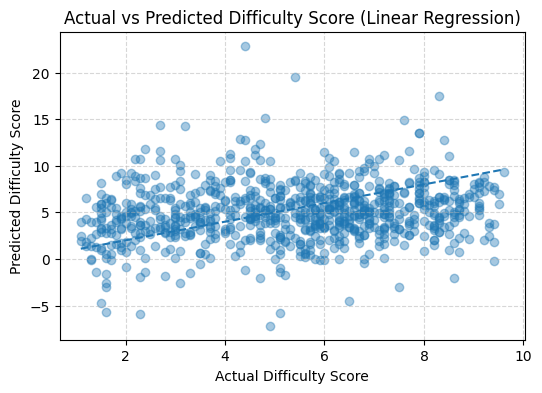

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(y_test, lr_pred, alpha=0.4)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle="--"
)
plt.title("Actual vs Predicted Difficulty Score (Linear Regression)")
plt.xlabel("Actual Difficulty Score")
plt.ylabel("Predicted Difficulty Score")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


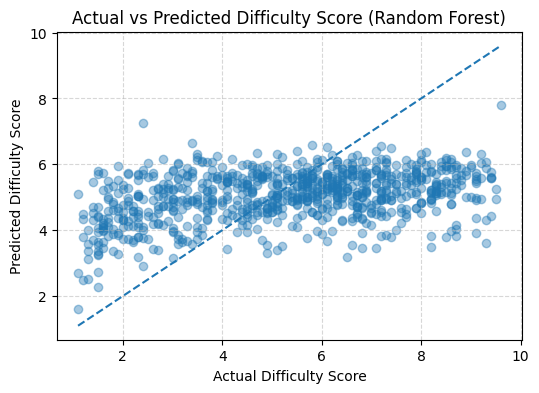

In [9]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, rf_pred, alpha=0.4)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle="--"
)
plt.title("Actual vs Predicted Difficulty Score (Random Forest)")
plt.xlabel("Actual Difficulty Score")
plt.ylabel("Predicted Difficulty Score")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


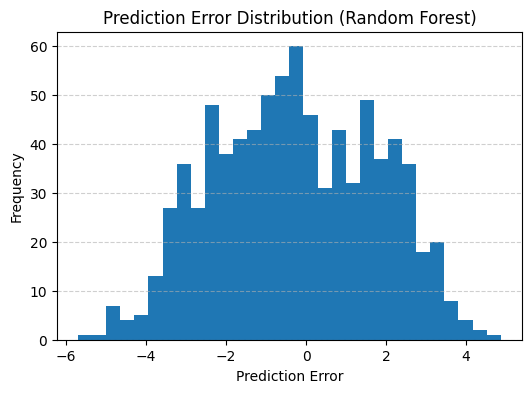

In [10]:
rf_errors = rf_pred - y_test

plt.figure(figsize=(6,4))
plt.hist(rf_errors, bins=30)
plt.title("Prediction Error Distribution (Random Forest)")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


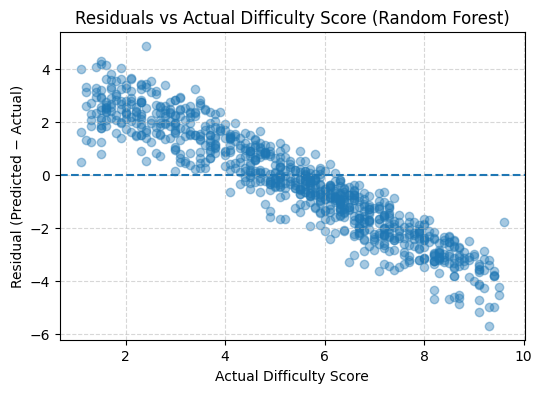

In [11]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, rf_errors, alpha=0.4)
plt.axhline(0, linestyle="--")
plt.title("Residuals vs Actual Difficulty Score (Random Forest)")
plt.xlabel("Actual Difficulty Score")
plt.ylabel("Residual (Predicted − Actual)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


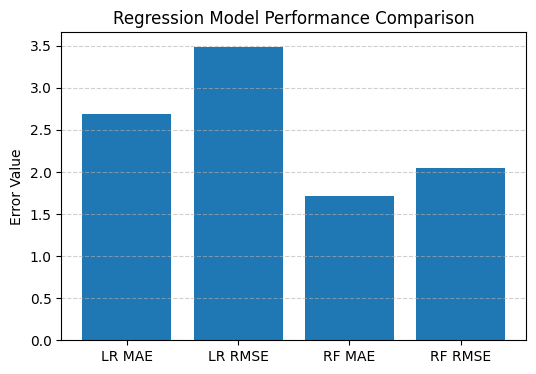

In [12]:
plt.figure(figsize=(6,4))
plt.bar(
    ["LR MAE", "LR RMSE", "RF MAE", "RF RMSE"],
    [lr_mae, lr_rmse, rf_mae, rf_rmse]
)
plt.title("Regression Model Performance Comparison")
plt.ylabel("Error Value")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


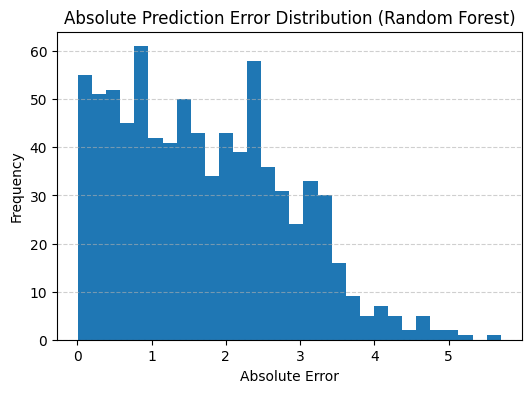

In [13]:
plt.figure(figsize=(6,4))
plt.hist(abs(rf_errors), bins=30)
plt.title("Absolute Prediction Error Distribution (Random Forest)")
plt.xlabel("Absolute Error")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()
